### Library Import and Dataset Load

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
dataset = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(dataset)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Cleaning and Reshaping Dataset

In [3]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin']) #dropping some unnecessary columns
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [4]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1}) #mapping sex to 0 and 1

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median()) #filling up age values with median

In [6]:
df = df.dropna(subset=['Embarked']) #drop rows with missing embarked values

In [7]:
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2}) #mapping embarked to 0,1,2

In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Feature Mapping and Dataset Splitting

In [9]:
y = df['Survived']

In [10]:
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=69
)

### Train, Predict, Evaluate

In [12]:
model = LogisticRegression(max_iter=1000) #training a logistic regression model on training dataset
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(x_test) #making predictions on test data

In [14]:
accuracy = accuracy_score(y_test, y_pred) #getting accuracy of the model's prediction
accuracy

0.848314606741573

In [15]:
cm = confusion_matrix(y_test, y_pred) #getting confusion matrix
print(cm)

[[110  12]
 [ 15  41]]


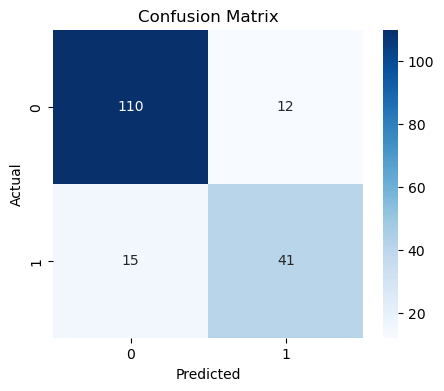

In [20]:
#visualizing the confusion matrix
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
